In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from sklearn.cluster import KMeans

sns.set()
%matplotlib inline

In [3]:
data = pd.read_csv("CreditCard.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
data = data.fillna(data.mean())

In [7]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
data[['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'TENURE']].nunique()

CASH_ADVANCE_TRX     65
PURCHASES_TRX       173
TENURE                7
dtype: int64

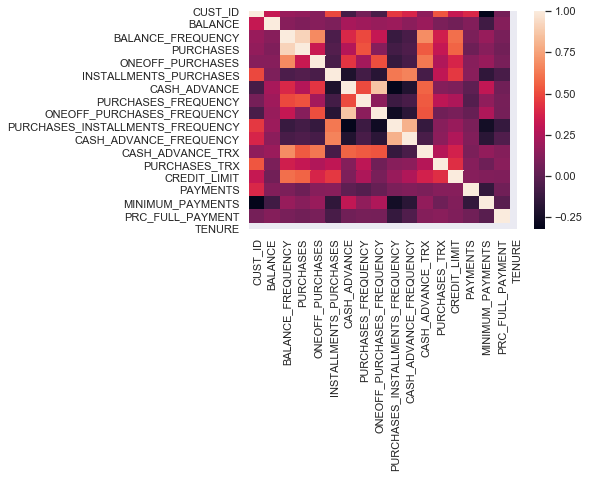

In [9]:
sns.heatmap(data.corr(),
            xticklabels=data.columns,
            yticklabels=data.columns
           )

In [16]:
features = data.copy()
list(features)

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [17]:
cols =  ['BALANCE',
         'PURCHASES',
         'ONEOFF_PURCHASES',
         'INSTALLMENTS_PURCHASES',
         'CASH_ADVANCE',
         'CASH_ADVANCE_TRX',
         'PURCHASES_TRX',
         'CREDIT_LIMIT',
         'PAYMENTS',
         'MINIMUM_PAYMENTS',
        ]

# Note: Adding 1 for each value to avoid inf values
features[cols] = np.log(1 + features[cols])

features.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.222222,12
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12
3,7.419183,0.636364,7.313220,7.313220,0.000000,5.331694,0.083333,0.083333,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,12
4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12


In [18]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
PURCHASES_TRX                       8950 non-null float64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT       

In [15]:
data.drop("CUST_ID", axis=1, inplace=True)

In [19]:
cols = list(features)
irq_score = {}

for c in cols:
    q1 = features[c].quantile(0.25)
    q3 = features[c].quantile(0.75)
    score = q3 - q1
    outliers = features[(features[c] < q1 - 1.5 * score) | (features[c] > q3 + 1.5 * score)][c]
    values = features[(features[c] >= q1 - 1.5 * score) | (features[c] <= q3 + 1.5 * score)][c]
    
    irq_score[c] = {
        "Q1": q1,
        "Q3": q3,
        "IRQ": score,
        "n_outliers": outliers.count(),
        "outliers_avg": outliers.mean(),
        "outliers_stdev": outliers.std(),
        "outliers_median": outliers.median(),
        "values_avg:": values.mean(),
        "values_stdev": values.std(),
        "values_median": values.median(),
    }
    
irq_score = pd.DataFrame.from_dict(irq_score, orient='index')

irq_score

,Q1,Q3,IRQ,n_outliers,outliers_avg,outliers_stdev,outliers_median,values_avg:,values_stdev,values_median
BALANCE,4.861995,7.628099,2.766104,132,0.126403,0.212619,0.000000,6.161637,2.013303,6.773521
BALANCE_FREQUENCY,0.888889,1.000000,0.111111,1493,0.396616,0.194740,0.454545,0.877271,0.236904,1.000000
PURCHASES,3.704627,7.013133,3.308506,0,NaN,NaN,NaN,4.899647,2.916872,5.892417
ONEOFF_PURCHASES,0.000000,6.360274,6.360274,0,NaN,NaN,NaN,3.204274,3.246365,3.663562
INSTALLMENTS_PURCHASES,0.000000,6.151961,6.151961,0,NaN,NaN,NaN,3.352403,3.082973,4.499810
CASH_ADVANCE,0.000000,7.016449,7.016449,0,NaN,NaN,NaN,3.319086,3.566298,0.000000
PURCHASES_FREQUENCY,0.083333,0.916667,0.833334,0,NaN,NaN,NaN,0.490351,0.401371,0.500000
ONEOFF_PURCHASES_FREQUENCY,0.000000,0.300000,0.300000,782,0.952398,0.065798,1.000000,0.202458,0.298336,0.083333
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000,0.750000,0.750000,0,NaN,NaN,NaN,0.364437,0.397448,0.166667
CASH_ADVANCE_FREQUENCY,0.000000,0.222222,0.222222,525,0.710399,0.137328,0.666667,0.135144,0.200121,0.000000


In [20]:
for col in cols:
    features[col] = pp.scale(np.array(features[col]))

features.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.205218,-0.249434,-0.113532,-0.987090,0.394480,-0.930733,-0.806490,-0.678661,-0.707313,-0.675349,-0.810069,-0.579510,-1.447207,-0.824484,-0.853119,-0.525551,0.36068
1,0.948918,0.134325,-1.679855,-0.987090,-1.087454,1.528788,-1.221758,-0.678661,-0.916995,0.573963,0.784603,-1.379210,0.925998,1.065033,0.870592,0.234227,0.36068
2,0.824993,0.518084,0.600727,1.062022,-1.087454,-0.930733,1.269843,2.673451,-0.916995,-0.675349,-0.810069,0.487865,1.010166,-0.119300,0.416585,-0.525551,0.36068
3,0.624653,-1.016953,0.827499,1.265778,-1.087454,0.564372,-1.014125,-0.399319,-0.916995,-0.258913,-0.123281,-0.874655,1.010166,-4.161996,0.687847,-0.525551,0.36068
4,0.271260,0.518084,-0.708481,-0.114307,-1.087454,-0.930733,-1.014125,-0.399319,-0.916995,-0.675349,-0.810069,-0.874655,-1.224955,-0.064979,-0.379047,-0.525551,0.36068


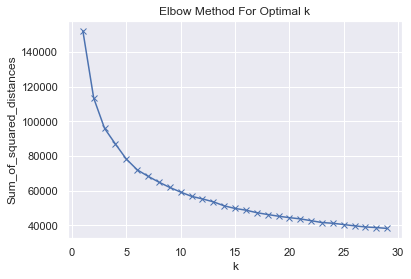

In [21]:
X = np.array(features)
Sum_of_squared_distances = []
K = range(1, 30)

for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

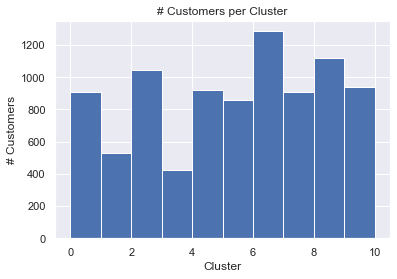

In [22]:
n_clusters = 10

clustering = KMeans(n_clusters=n_clusters,
                    random_state=0
                   )

cluster_labels = clustering.fit_predict(X)

# plot cluster sizes

plt.hist(cluster_labels, bins=range(n_clusters+1))
plt.title('# Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('# Customers')
plt.show()

# Assing cluster number to features and original dataframe
features['cluster_index'] = cluster_labels
data['cluster_index'] = cluster_labels